In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load your data 
data = pd.read_csv('cleaneded_main_model_data.csv')

# Select relevant features and target variable
selected_features = ['T (K)', 'P (MPa)', 'methane', 'ethane', 'propane', 'ibutane',
                     'ipentane', 'hexane', 'heptane', 'helium', 'oxygen', 'H2S', 'CO2']
target_variable = 'z'
X = data[selected_features]
y = data[target_variable]


In [2]:
data.describe()

,Gas #,T (K),d (mol/l),P (MPa),cv (J/mol-K),cp (J/mol-K),w (m/s),methane,nitrogen,CO2,...,nonane,decane,H2S,helium,water,oxygen,argon,hydrogen,CO,z
count,1796.000000,1796.000000,1796.000000,1796.000000,1796.000000,1796.000000,1796.000000,1796.000000,1796.000000,1796.000000,...,1796.0,1796.0,1796.0,1796.000000,1796.0,1796.0,1796.0,1796.0,1796.0,1796.000000
mean,64.697105,229.287468,8.177550,6.100930,37.153484,192.494130,359.765143,99.292848,0.496177,0.103796,...,0.0,0.0,0.0,0.013135,0.0,0.0,0.0,0.0,0.0,0.996774
std,29.301784,33.003261,4.768837,2.326829,60.495575,524.474003,76.646623,0.153775,0.150109,0.068761,...,0.0,0.0,0.0,0.007380,0.0,0.0,0.0,0.0,0.0,0.001098
min,3.000000,128.258000,0.490000,0.000000,25.801100,35.849000,130.840800,99.062610,0.367200,0.047000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.993590
25%,41.000000,201.885250,4.080000,4.782732,30.712800,56.965325,317.414375,99.159970,0.368300,0.048330,...,0.0,0.0,0.0,0.010160,0.0,0.0,0.0,0.0,0.0,0.996054
50%,66.000000,223.052500,8.000000,5.876810,32.861900,99.352500,357.937500,99.287500,0.512200,0.056020,...,0.0,0.0,0.0,0.015490,0.0,0.0,0.0,0.0,0.0,0.996711
75%,90.000000,254.472500,11.850000,7.632417,34.971900,165.372300,386.465525,99.289590,0.567340,0.118870,...,0.0,0.0,0.0,0.018890,0.0,0.0,0.0,0.0,0.0,0.997312
max,113.000000,293.986000,20.600000,10.411594,1446.217000,10430.481600,925.136500,99.549400,0.860440,0.218080,...,0.0,0.0,0.0,0.018930,0.0,0.0,0.0,0.0,0.0,0.999146


In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [5]:
# Define the Weighted K-NN model with 'distance' weighting
model = KNeighborsRegressor(n_neighbors=5, weights='distance')

# Fit the model to the training data
model.fit(X_train, y_train)


KNeighborsRegressor(weights='distance')

In [6]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate MAE, MAPE, RMSE, and R2
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Mean Absolute Error (MAE): {mae:.9f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.9f}%')
print(f'Root Mean Squared Error (RMSE): {rmse:.9f}')
print(f'R-squared (R2) Value: {r2:.9f}')


Mean Absolute Error (MAE): 0.000071690
Mean Absolute Percentage Error (MAPE): 0.007197212%
Root Mean Squared Error (RMSE): 0.000159441
R-squared (R2) Value: 0.977443437


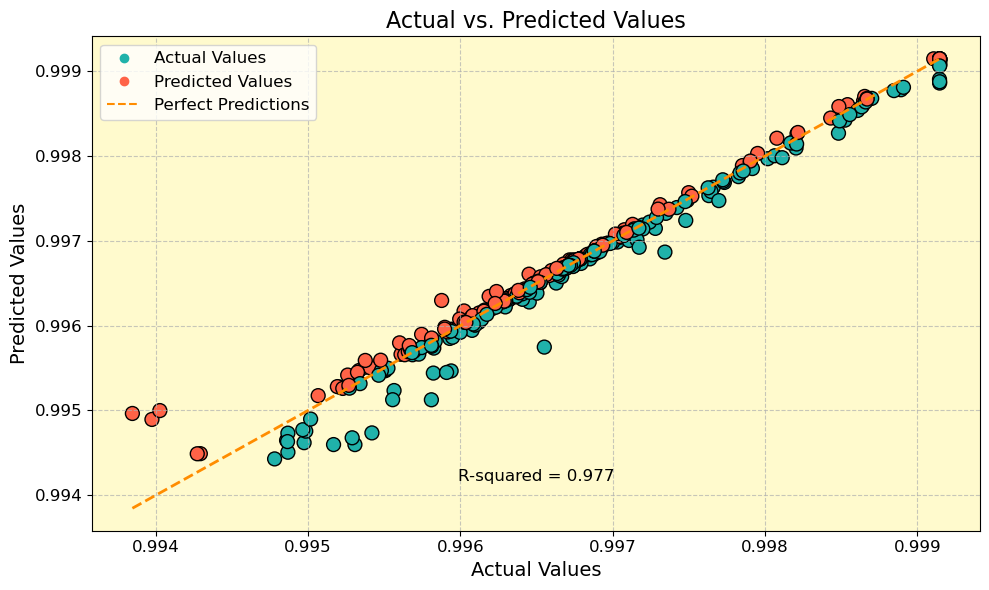

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches

# Assuming 'y_test' and 'y_pred' are defined and represent true and predicted values

# Create a visually appealing and eye-catching scatter plot
plt.figure(figsize=(10, 6))

# Define custom colors for data points
custom_colors = ['lightseagreen' if y >= y_pred else 'tomato' for y, y_pred in zip(y_test, y_pred)]

# Use clear markers for data points
plt.scatter(y_test, y_pred, s=100, c=custom_colors, edgecolors='k', marker='o')

# Add a line representing perfect predictions
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--',
         color='darkorange', linewidth=2, label='Perfect Predictions')

plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.title('Actual vs. Predicted Values', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Calculate R-squared value
r_squared = r2_score(y_test, y_pred)
r_squared_text = f'R-squared = {round(r_squared, 3)}'

# Add R-squared value to the plot
plt.text(0.5, 0.1, r_squared_text, fontsize=12, ha='center', transform=plt.gca().transAxes)

# Set a visually appealing background color
plt.gca().set_facecolor('#FFFACD')  # LemonChiffon

# Create custom legend handles and labels for actual and predicted values
legend_handles = [
    plt.Line2D([0], [0], marker='o', markersize=6, color='lightseagreen', linestyle='None'),
    plt.Line2D([0], [0], marker='o', markersize=6, color='tomato', linestyle='None'),
    plt.Line2D([0], [0], color='darkorange', linestyle='--')
]

legend_labels = ['Actual Values', 'Predicted Values', 'Perfect Predictions']

# Customize the legend with custom handles and labels
plt.legend(legend_handles, legend_labels, fontsize=12)

plt.tight_layout()
plt.show()


C:\Users\okola\AppData\Local\Temp\ipykernel_168\3399568956.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('tab20c')


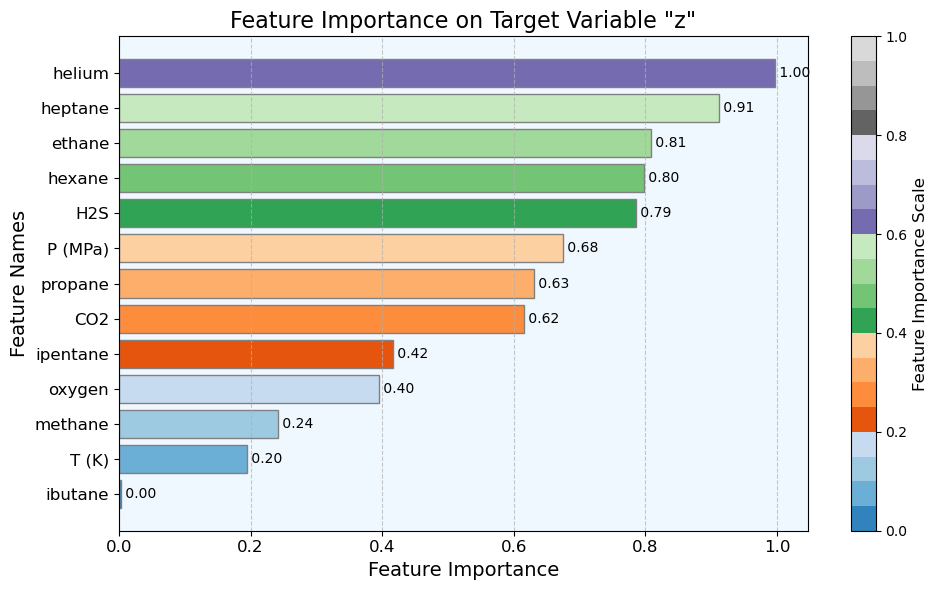

In [7]:
from matplotlib.cm import get_cmap

# Sample feature importance values 
feature_importance = np.random.rand(len(selected_features))

# Sort the features by importance
sorted_indices = np.argsort(feature_importance)
sorted_feature_names = [selected_features[i] for i in sorted_indices]
sorted_feature_importance = [feature_importance[i] for i in sorted_indices]

# Create a color map with multiple beautiful colors
cmap = get_cmap('tab20c')

# Create a visually appealing bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Missing closing parenthesis for the color argument
bars = ax.barh(sorted_feature_names,
               sorted_feature_importance, color=[cmap(i) 
                                                                       
                                                 for i in range(len(sorted_feature_names))], edgecolor='gray')

plt.xlabel('Feature Importance', fontsize=14)
plt.ylabel('Feature Names', fontsize=14)
plt.title('Feature Importance on Target Variable "{}"'.format(target_variable), fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add values to the right of the bars with vibrant colors
for i, v in enumerate(sorted_feature_importance):
    ax.text(v, i, f' {v:.2f}', fontsize=10, va='center', color='black')

# Set a brighter background color
ax.set_facecolor('#F0F8FF')  # AliceBlue

# Add grid lines for clarity
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Create a color bar to show the feature importance scale
norm = plt.Normalize(0, 1)  # Adjust the range based on your feature importance values
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

cbar = plt.colorbar(sm, ax=ax, orientation='vertical')
cbar.set_label('Feature Importance Scale', fontsize=12)
cbar.ax.tick_params(labelsize=10)

plt.tight_layout()
plt.show()


In [8]:
# Create a DataFrame for predictions
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Save the DataFrame to a CSV file
predictions_df.to_csv('Weighted_KNN_pred_values.csv', index=False)
